In [3]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

def line(x, k, b):
    return k*x + b

In [4]:
dataframes = []
for i in range(1, 4):
    dataframes.append(pd.read_csv(f"data_setup_{i}.csv", sep="\t"))
x_name, y_name = dataframes[0].columns

background = pd.read_csv("background_radiation.csv", sep="\t")

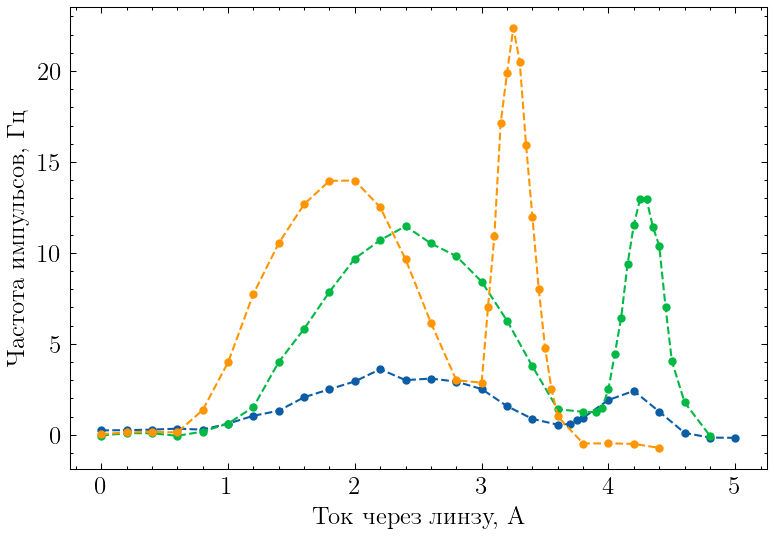

In [5]:
for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    plt.plot(I, nu, ".--")

plt.xlabel("Ток через линзу, А")
plt.ylabel(y_name)
    
plt.savefig("all_setups-NU_on_I.png")
plt.show()

In [6]:
c = 3e10
m_e = 9.11e-28
T_k = 0.624e6 # энергия электронов внутрненней конверсии, эВ
def p2T(p):
    return (p**2 * c**2 + m_e**2 * c**4)**.5 - m_e * c**2
def T2p(T):
    return ((T + m_e*c**2)**2 - m_e**2*c**4)**.5/c
    
p_k = T2p(T_k)

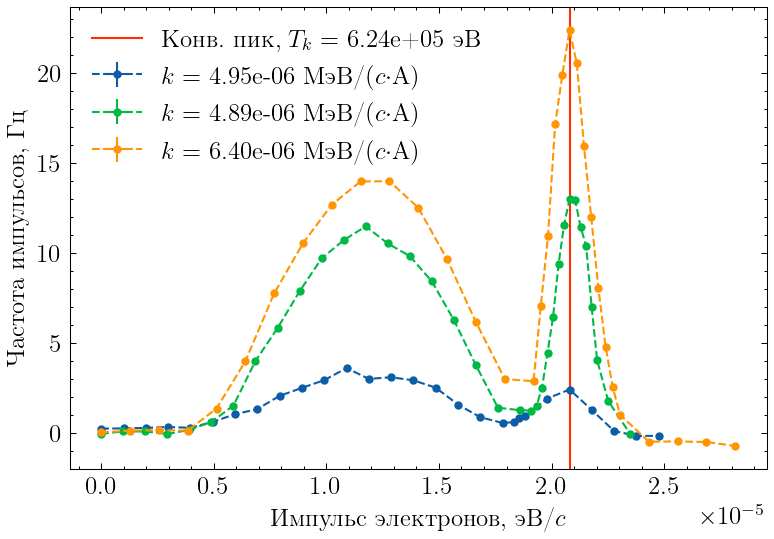

In [7]:
for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    idxmax = nu[16:].idxmax()
    k = p_k / I[idxmax]
    
    plt.errorbar(I*k, nu, xerr=0, yerr=dev, fmt=".--", label=fr"$k=$ {k:.2e} МэВ/($c\cdot$A)")
    # plt.plot(I*k, nu, ".--", label=fr"$k={k:.2f}$ МэВ/А")
    # plt.plot(I[idxmax]*k, nu[idxmax], "x")

plt.axvline(p_k, c="C3", label=fr"Конв. пик, $T_k=$ {T_k:.2e} эВ")
    
plt.xlabel(r"Импульс электронов, эВ/$c$")
plt.ylabel(y_name)

plt.legend()
plt.savefig("all_setups-NU_on_p.png")
plt.show()

In [91]:
def N(E, K, m_nu):
    return -K*(E - .6e6) * np.sqrt(1 - (m_nu**2 * c**4)/(2*(E - .6e6)**2))

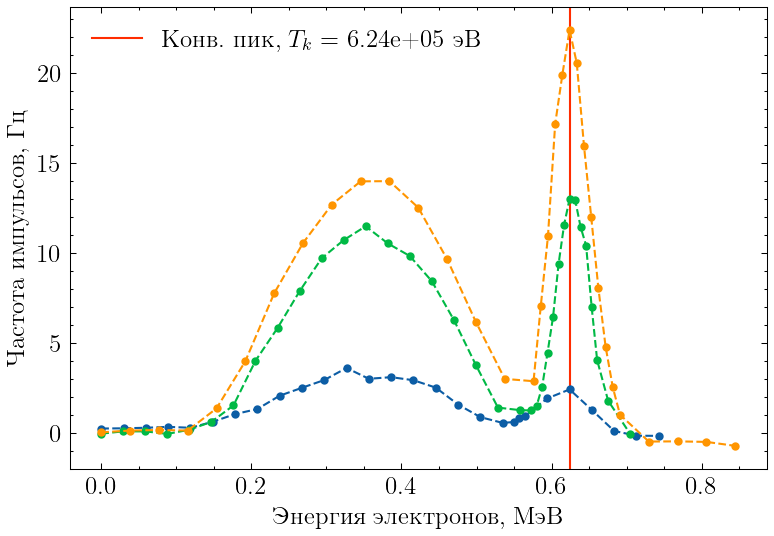

In [93]:
for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    idxmax = nu[16:].idxmax()
    k = p_k / I[idxmax]
    p = I*k
    T = p2T(p)
    plt.errorbar(T*1e-6, nu, xerr=0, yerr=dev, fmt=".--")
    
    # idxs = (T>.73e6)
    # if (sum(idxs) > 2):
    #     (K, m_nu), _ = curve_fit(N, T[idxs], nu[idxs], p0=(1e-3, 1e-3))
    #     print(f'{m_nu} {K}')
    #     plt.plot(T[idxs], N(T[idxs], K, m_nu), lw=.3)
    #     plt.plot(T[idxs], nu[idxs])

plt.axvline(T_k*1e-6, c="C3", label=fr"Конв. пик, $T_k=$ {T_k:.2e} эВ")
    
plt.xlabel(r"Энергия электронов, МэВ")
plt.ylabel(y_name)

plt.legend()
plt.savefig("all_setups-NU_on_T.png")
plt.show()

### График Ферми

1.0
1.0
1.0


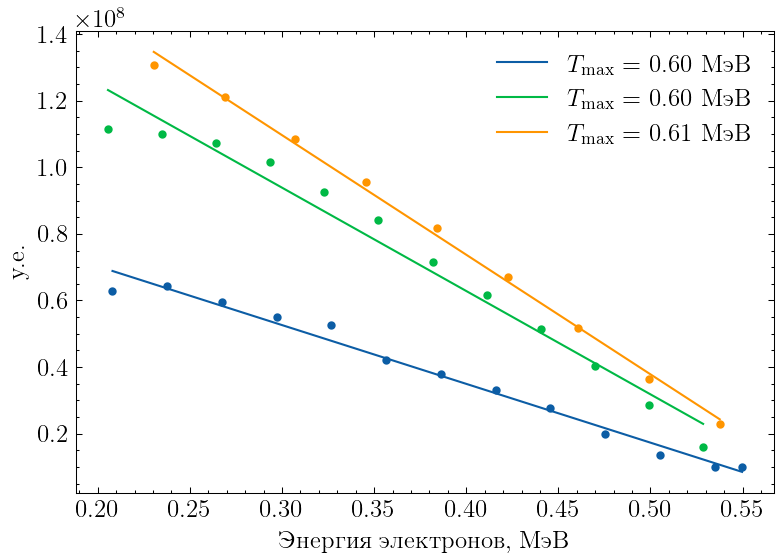

In [18]:
for i, (df, bg) in enumerate(zip(dataframes, background.iterrows())):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    idxmax = nu[16:].idxmax()
    k = p_k / I[idxmax]
    p = I*k
    T = p2T(p)*1e-6
    
    idxs = (T>2e-1) * (T<5.5e-1)

    (k, b), _ = curve_fit(line, T[idxs], (nu**0.5 / p**(3/2))[idxs])
    
    plt.plot(T[idxs], (nu**0.5 / p**(3/2))[idxs], ".", c=f"C{i}")
    plt.plot(T[idxs], line(T[idxs], k,b), c=f"C{i}", label=r"$T_\text{max}=$" + f" {-b/k:.2f} МэВ")
    T_max = -b/k

plt.xlabel("Энергия электронов, МэВ")
plt.ylabel("у.е.")

plt.legend()
plt.savefig("all_setups-fermi.png")
plt.show()